In [1]:
from random import random,sample
import numpy as np
import time
import math
import matplotlib.pyplot as plt
!pip install haversine
from haversine import haversine
import matplotlib.cm as cm

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def tsp_read(nodes):
    infile = open(nodes, 'r')
    content = infile.readline().strip().split()
    print("\n\nDataset Name :", content[2])

    while content[0] != 'NODE_COORD_SECTION':
        if(content[0] == 'DIMENSION'):
            dimension = content[2]
        content = infile.readline().strip().split()
    nodelist = []
    placelist = []
    print('Number of cities :', dimension)
    N = int(dimension)
    for i in range(0, N):
        x, y, z = infile.readline().strip().split()[:]
        nodelist.append([float(y), float(z)])
        placelist.append(x)

    infile.close()
    return nodelist, placelist

In [ ]:
def euclidean_distance(nodes, n1, n2):
    distance = math.sqrt((nodes[n1][0]-nodes[n2][0])**2 + (nodes[n1][1]-nodes[n2][1])**2)
    return distance

In [ ]:
def global_distance(nodes,n1,n2):
    distance = haversine((nodes[n1][0],nodes[n1][1]), (nodes[n2][0],nodes[n2][1]), unit='km')
    return distance

In [ ]:
def cooling_function(T):
    return T * 0.9999

In [ ]:
def get_path_cost(dist, path):
    cost = 0
    length = len(path)
    for i in range(length):
        cost = cost + dist[path[i], path[(i+1) % length]]
    return cost

In [ ]:
def simulated_annealing(nodes, dist, n):
    path = np.random.permutation(n)
    path_cost = get_path_cost(dist, path)
    initial_path = path
    initial_path_cost = path_cost

    no_iter = -1
    iteration = 1000000
    temperature = n*1000

    for i in range(iteration):
        rev = sample(range(len(nodes)),2)
        newpath = path.copy()
        newpath[rev[0]:rev[1]+1] = newpath[rev[0]:rev[1]+1][::-1]
        new_pathcost = get_path_cost(dist, newpath)

        delE = path_cost - new_pathcost
        try:
            prob = 1 / (1 + math.exp(-delE / temperature))
        except OverflowError:
            prob = 0

        if delE > 0:
            path = newpath.copy()
            path_cost = new_pathcost
        elif random() < prob:
            path = newpath.copy()
            path_cost = new_pathcost

        temperature = cooling_function(temperature)
        if(temperature < 1e-8):
            no_iter = i
            break

    return path, path_cost, initial_path, initial_path_cost, no_iter

In [ ]:
def graph(nodes, path):
    X = []
    Y = []
    length = len(path)

    cmap = cm.get_cmap('viridis')
    node_color = cmap(0.2)
    path_color = cmap(0.8)

    for i in range(length):
        X.append(nodes[path[i]][0])
        Y.append(nodes[path[i]][1])
        plt.plot(nodes[path[i]][0], nodes[path[i]][1], 'o', color=node_color, markersize=5)

    # Plot the path
    X.append(nodes[path[0]][0])
    Y.append(nodes[path[0]][1])
    plt.plot(X, Y, color=path_color, linewidth=2)

In [ ]:
def print_path(path,place):
    for i in range(len(path)):
        print(place[path[i]],"-->", end =" ")
    print(place[path[0]])



Dataset Name : Rajasthan
Number of cities : 20

Initial Path Cost: 5473.151020191886
Initial Path :
Bikaner --> Chittorgarh --> Jaisalmer --> Bharatpur --> Dechu --> Kota --> Shekhawati --> Ranthambore_Fort --> Bundi --> Jodhpur --> Ajmer --> Sariska_Tiger_Reserve --> Udaipur --> Mount_Abu --> Ranthambore_National_Park --> Jaipur --> Neemrana --> Bhangarh_Fort --> Shakambari_Jheel --> Pali --> Bikaner

Optimal Path Cost: 2087.445285101681
Optimal Path:
Bhangarh_Fort --> Sariska_Tiger_Reserve --> Neemrana --> Bharatpur --> Ranthambore_National_Park --> Ranthambore_Fort --> Kota --> Bundi --> Chittorgarh --> Udaipur --> Mount_Abu --> Pali --> Jodhpur --> Dechu --> Jaisalmer --> Bikaner --> Shekhawati --> Shakambari_Jheel --> Ajmer --> Jaipur --> Bhangarh_Fort
No. of Iterations in Simulated Annealing: 283227
Simulated Annealing execution time in seconds : 5.444598754 seconds


<ipython-input-9-7df46cea7317>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


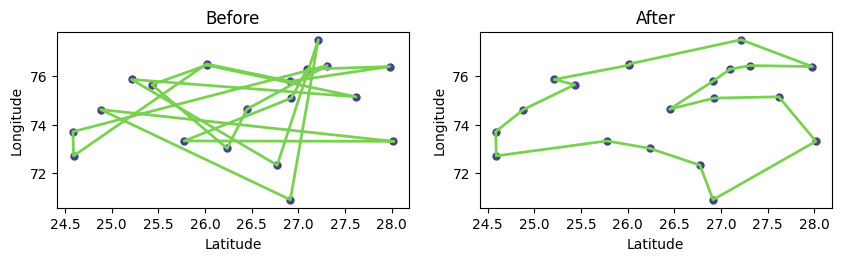



Dataset Name : xqg237
Number of cities : 237

Initial Path Cost: 12414.932724265085
Initial Path :
119 --> 145 --> 24 --> 82 --> 5 --> 34 --> 199 --> 189 --> 178 --> 147 --> 132 --> 47 --> 10 --> 64 --> 83 --> 203 --> 74 --> 120 --> 165 --> 102 --> 62 --> 216 --> 53 --> 204 --> 56 --> 2 --> 146 --> 61 --> 23 --> 105 --> 26 --> 235 --> 106 --> 176 --> 91 --> 7 --> 234 --> 202 --> 220 --> 207 --> 144 --> 219 --> 3 --> 156 --> 32 --> 104 --> 221 --> 186 --> 174 --> 100 --> 79 --> 6 --> 80 --> 43 --> 86 --> 190 --> 168 --> 183 --> 69 --> 39 --> 35 --> 194 --> 28 --> 182 --> 13 --> 155 --> 15 --> 187 --> 122 --> 40 --> 123 --> 179 --> 63 --> 181 --> 11 --> 72 --> 218 --> 54 --> 66 --> 89 --> 136 --> 143 --> 159 --> 27 --> 16 --> 142 --> 209 --> 52 --> 164 --> 99 --> 94 --> 231 --> 157 --> 172 --> 97 --> 33 --> 210 --> 201 --> 78 --> 95 --> 170 --> 158 --> 93 --> 45 --> 127 --> 73 --> 211 --> 20 --> 217 --> 222 --> 163 --> 118 --> 129 --> 185 --> 166 --> 68 --> 213 --> 65 --> 131 --> 154 -

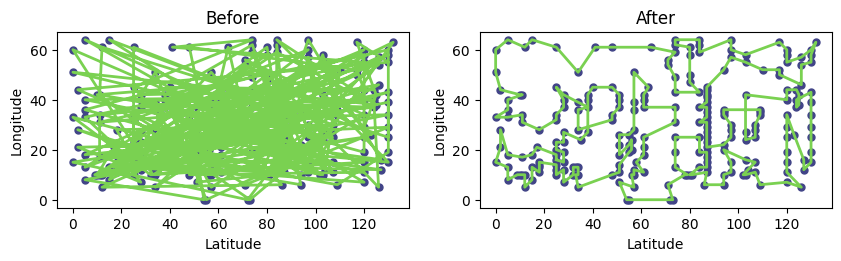



Dataset Name : pma343
Number of cities : 343

Initial Path Cost: 35723.29552178087
Initial Path :
313 --> 303 --> 225 --> 187 --> 97 --> 31 --> 42 --> 218 --> 9 --> 299 --> 118 --> 192 --> 258 --> 137 --> 76 --> 287 --> 164 --> 101 --> 142 --> 53 --> 56 --> 81 --> 119 --> 80 --> 246 --> 309 --> 180 --> 61 --> 63 --> 156 --> 296 --> 115 --> 204 --> 171 --> 125 --> 307 --> 149 --> 186 --> 177 --> 105 --> 174 --> 116 --> 59 --> 332 --> 244 --> 210 --> 221 --> 14 --> 219 --> 87 --> 38 --> 23 --> 268 --> 333 --> 327 --> 103 --> 178 --> 7 --> 136 --> 236 --> 6 --> 52 --> 340 --> 253 --> 314 --> 275 --> 113 --> 10 --> 44 --> 227 --> 155 --> 69 --> 109 --> 104 --> 217 --> 166 --> 240 --> 305 --> 226 --> 54 --> 279 --> 241 --> 170 --> 203 --> 322 --> 288 --> 16 --> 60 --> 197 --> 334 --> 321 --> 233 --> 37 --> 290 --> 88 --> 239 --> 250 --> 220 --> 189 --> 302 --> 99 --> 27 --> 205 --> 20 --> 235 --> 300 --> 158 --> 285 --> 85 --> 138 --> 295 --> 47 --> 215 --> 107 --> 323 --> 316 --> 129 -->

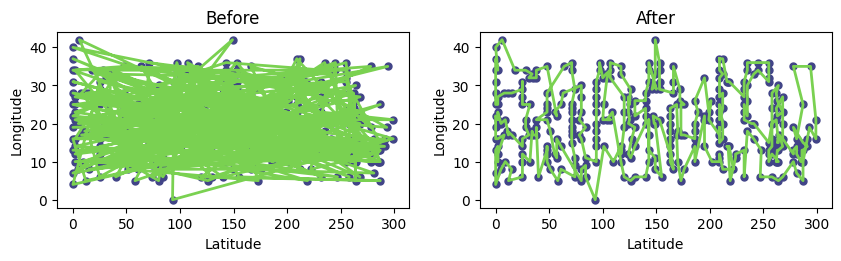



Dataset Name : pka379
Number of cities : 379

Initial Path Cost: 38491.225726221375
Initial Path :
338 --> 221 --> 334 --> 25 --> 229 --> 285 --> 354 --> 309 --> 214 --> 28 --> 211 --> 295 --> 184 --> 13 --> 355 --> 201 --> 182 --> 304 --> 333 --> 153 --> 366 --> 91 --> 51 --> 5 --> 133 --> 313 --> 132 --> 167 --> 59 --> 209 --> 101 --> 39 --> 206 --> 135 --> 15 --> 197 --> 78 --> 264 --> 216 --> 104 --> 339 --> 306 --> 56 --> 350 --> 24 --> 307 --> 53 --> 103 --> 19 --> 305 --> 118 --> 50 --> 137 --> 107 --> 260 --> 268 --> 20 --> 347 --> 314 --> 155 --> 322 --> 364 --> 79 --> 240 --> 183 --> 247 --> 296 --> 30 --> 110 --> 270 --> 241 --> 370 --> 119 --> 166 --> 17 --> 156 --> 144 --> 362 --> 93 --> 57 --> 237 --> 6 --> 231 --> 274 --> 73 --> 21 --> 49 --> 45 --> 287 --> 178 --> 176 --> 294 --> 162 --> 47 --> 265 --> 188 --> 288 --> 69 --> 210 --> 258 --> 203 --> 109 --> 369 --> 301 --> 290 --> 190 --> 4 --> 128 --> 164 --> 86 --> 284 --> 12 --> 32 --> 324 --> 88 --> 379 --> 100 -->

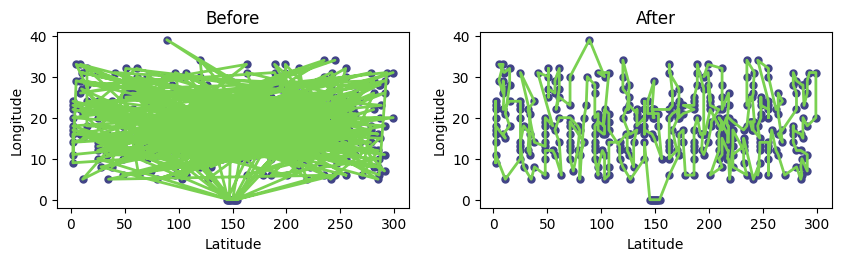



Dataset Name : bcl380
Number of cities : 380

Initial Path Cost: 24799.664597129464
Initial Path :
350 --> 237 --> 144 --> 313 --> 127 --> 333 --> 166 --> 179 --> 62 --> 49 --> 236 --> 97 --> 162 --> 88 --> 308 --> 32 --> 51 --> 365 --> 132 --> 95 --> 19 --> 305 --> 243 --> 239 --> 66 --> 196 --> 149 --> 341 --> 276 --> 102 --> 155 --> 158 --> 17 --> 30 --> 40 --> 157 --> 353 --> 366 --> 61 --> 251 --> 4 --> 94 --> 173 --> 114 --> 154 --> 120 --> 312 --> 320 --> 78 --> 263 --> 216 --> 351 --> 82 --> 326 --> 83 --> 257 --> 360 --> 28 --> 7 --> 214 --> 294 --> 375 --> 258 --> 297 --> 48 --> 136 --> 289 --> 163 --> 190 --> 43 --> 70 --> 318 --> 206 --> 168 --> 22 --> 279 --> 367 --> 269 --> 372 --> 143 --> 131 --> 34 --> 209 --> 122 --> 111 --> 159 --> 238 --> 264 --> 145 --> 67 --> 253 --> 324 --> 346 --> 92 --> 90 --> 261 --> 160 --> 71 --> 45 --> 311 --> 295 --> 68 --> 152 --> 337 --> 241 --> 21 --> 69 --> 31 --> 96 --> 137 --> 135 --> 176 --> 161 --> 9 --> 230 --> 53 --> 75 --> 128 

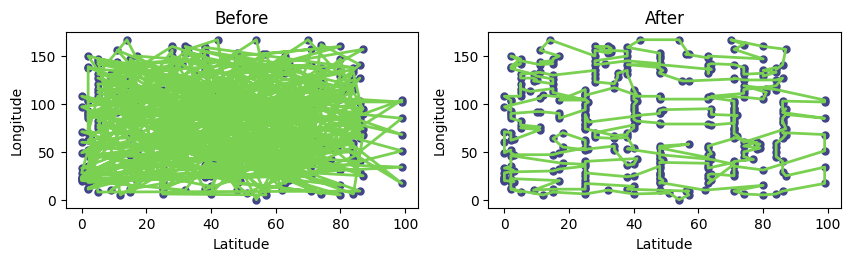



Dataset Name : pbl395
Number of cities : 395

Initial Path Cost: 18740.060277208497
Initial Path :
354 --> 335 --> 190 --> 297 --> 188 --> 358 --> 44 --> 84 --> 386 --> 28 --> 338 --> 243 --> 90 --> 93 --> 25 --> 104 --> 131 --> 356 --> 231 --> 326 --> 226 --> 30 --> 301 --> 153 --> 260 --> 38 --> 71 --> 167 --> 204 --> 159 --> 155 --> 207 --> 254 --> 91 --> 352 --> 390 --> 216 --> 334 --> 227 --> 154 --> 47 --> 68 --> 125 --> 45 --> 56 --> 136 --> 328 --> 299 --> 127 --> 241 --> 135 --> 311 --> 302 --> 310 --> 332 --> 306 --> 27 --> 74 --> 89 --> 26 --> 322 --> 191 --> 377 --> 51 --> 168 --> 133 --> 263 --> 361 --> 292 --> 218 --> 65 --> 374 --> 163 --> 319 --> 265 --> 96 --> 309 --> 369 --> 169 --> 137 --> 331 --> 219 --> 19 --> 157 --> 378 --> 385 --> 187 --> 291 --> 293 --> 115 --> 156 --> 364 --> 195 --> 363 --> 7 --> 162 --> 63 --> 257 --> 303 --> 29 --> 70 --> 197 --> 353 --> 344 --> 139 --> 255 --> 375 --> 370 --> 225 --> 337 --> 147 --> 210 --> 246 --> 384 --> 256 --> 101 --

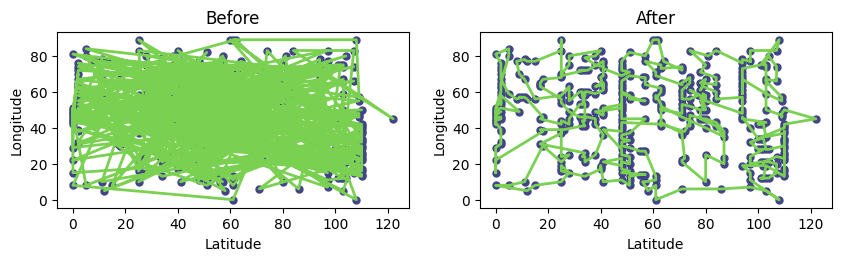

In [ ]:
def main():
    folder_path = '/content/drive/MyDrive/AI_Labs/Lab3/Data'

    datalist = [
        folder_path + "/Rajasthan.tsp",
        folder_path + "/xqg237.tsp",
        folder_path + "/pma343.tsp",
        folder_path + "/pka379.tsp",
        folder_path + "/bcl380.tsp",
        folder_path + "/pbl395.tsp"
    ]

    iterator = 1
    for d in datalist:
        nodes, place = tsp_read(d)
        coords = np.array(nodes)
        n = len(coords)

        dist = np.zeros((n, n), dtype=float)

        for i in range(n):
            for j in range(i+1, n):
                if d == folder_path + "/Rajasthan.tsp":
                    dist[i, j] = global_distance(nodes, i, j)
                else:
                    dist[i, j] = euclidean_distance(nodes, i, j)
                dist[j, i] = dist[i, j]

        start = time.time_ns()
        best_path, best_cost, initial_path, path_cost, no_iter = simulated_annealing(nodes, dist, n)
        end = time.time_ns()
        print('\nInitial Path Cost:', path_cost)
        print('Initial Path :' )
        print_path(initial_path,place)

        print('\nOptimal Path Cost:', best_cost)
        print('Optimal Path:')
        print_path(best_path,place)
        print('No. of Iterations in Simulated Annealing:', no_iter)
        print('Simulated Annealing execution time in seconds :', (end-start)/1e9,"seconds")

        plt.figure(figsize = (10,16))
        plt.subplot(len(datalist), 2, iterator)
        graph(nodes, initial_path)
        plt.title("Before")
        plt.xlabel("Latitude")
        plt.ylabel("Longitude")
        iterator += 1
        plt.subplot(len(datalist), 2, iterator)
        graph(nodes, best_path)
        plt.title("After")
        plt.xlabel("Latitude")
        plt.ylabel("Longitude")
        iterator += 1
        plt.show()


main()